<a href="https://colab.research.google.com/github/SGP23/MACHINE_LEARNING_PROJECTS/blob/main/Data-Driven%20Loan%20Approval%20Prediction%20(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📥 Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

#📂 Load and Inspect Dataset

In [ ]:
data=pd.read_csv(r"/content/ML Project - Naive Bayes Loan Status Classification U16955482770.txt")

In [ ]:
data

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1.0,1.0,1.0,NaN,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,22.0,39,188948.0,192815.0,28365.0,884.0,31237.0,1598.0,85.0,2.0,53.0,347.0,5.0,1.0,Not Default
29996,29997,15.0,43,1683.0,1828.0,352.0,8979.0,519.0,NaN,1837.0,3526.0,8998.0,129.0,NaN,NaN,Not Default
29997,29998,3.0,37,3565.0,3356.0,2758.0,2878.0,2582.0,19357.0,NaN,NaN,22.0,42.0,2.0,31.0,Default
29998,29999,8.0,41,-1645.0,78379.0,7634.0,52774.0,11855.0,48944.0,859.0,349.0,1178.0,1926.0,52964.0,184.0,Default


In [ ]:
data.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1.0,1.0,1.0,NaN,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default


In [ ]:
data.tail()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
29995,29996,22.0,39,188948.0,192815.0,28365.0,884.0,31237.0,1598.0,85.0,2.0,53.0,347.0,5.0,1.0,Not Default
29996,29997,15.0,43,1683.0,1828.0,352.0,8979.0,519.0,NaN,1837.0,3526.0,8998.0,129.0,NaN,NaN,Not Default
29997,29998,3.0,37,3565.0,3356.0,2758.0,2878.0,2582.0,19357.0,NaN,NaN,22.0,42.0,2.0,31.0,Default
29998,29999,8.0,41,-1645.0,78379.0,7634.0,52774.0,11855.0,48944.0,859.0,349.0,1178.0,1926.0,52964.0,184.0,Default
29999,3,5.0,46,47929.0,4895.0,49764.0,36535.0,32428.0,15313.0,278.0,18.0,143.0,1.0,1.0,1.0,Default


In [ ]:
data.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,27992.000000,27494.000000,27130.000000,26805.000000,26494.000000,25980.000000,24751.000000,2.460400e+04,24032.000000,23592.000000,23297.000000,22827.000000
mean,10666.660700,14.648867,32.427900,33989.494570,33938.750418,32617.867011,30709.504160,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
std,9698.091793,189.496507,12.718991,61569.150299,60904.557498,58654.145088,54827.113904,51729.302253,51625.821980,12548.633278,1.849890e+04,12242.048527,11056.957868,11071.445005,13358.162766
min,1.000000,1.000000,3.000000,-154973.000000,-69777.000000,-157264.000000,-81334.000000,-81334.000000,-94625.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,1850.500000,4.000000,26.000000,1574.000000,1556.000000,1534.000000,1433.000000,1327.000000,1261.000000,15.000000,1.400000e+01,8.000000,6.000000,5.000000,5.000000
50%,7483.500000,9.000000,33.000000,8551.500000,8697.500000,8889.500000,8671.000000,8131.500000,7819.000000,166.000000,1.640000e+02,119.000000,75.000000,75.000000,78.000000
75%,18746.250000,21.000000,41.000000,38251.750000,38605.500000,36534.250000,32855.000000,29680.500000,29459.750000,1667.000000,1.662000e+03,1381.250000,983.000000,982.000000,1133.000000
max,29999.000000,32768.000000,79.000000,964511.000000,983931.000000,693131.000000,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,417588.000000,528897.000000,426529.000000,528666.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   AGE             30000 non-null  int64  
 3   BILL_AMT1       27992 non-null  float64
 4   BILL_AMT2       27494 non-null  float64
 5   BILL_AMT3       27130 non-null  float64
 6   BILL_AMT4       26805 non-null  float64
 7   BILL_AMT5       26494 non-null  float64
 8   BILL_AMT6       25980 non-null  float64
 9   PAY_AMT1        24751 non-null  float64
 10  PAY_AMT2        24604 non-null  float64
 11  PAY_AMT3        24032 non-null  float64
 12  PAY_AMT4        23592 non-null  float64
 13  PAY_AMT5        23297 non-null  float64
 14  PAY_AMT6        22827 non-null  float64
 15  Default Status  30000 non-null  object 
dtypes: float64(13), int64(2), object(1)
memory usage: 3.7+ MB


In [ ]:
data.sample()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
22584,22585,18.0,39,NaN,NaN,NaN,3.0,3.0,15.0,NaN,NaN,3.0,NaN,NaN,645.0,Not Default


In [ ]:
data.columns


Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default Status'],
      dtype='object')

In [ ]:
data.isnull()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,False,False,False,False,False,False,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False
29997,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
ID,0
LIMIT_BAL,0
AGE,0
BILL_AMT1,2008
BILL_AMT2,2506
BILL_AMT3,2870
BILL_AMT4,3195
BILL_AMT5,3506
BILL_AMT6,4020
PAY_AMT1,5249


#🧹 Handle Missing Values

In [ ]:
lis=list(data.columns[data.isnull().any()])

In [ ]:
for i in lis:
  data[i]=data[i].fillna(data[i].mean())

In [ ]:
data.isnull().sum()

,0
ID,0
LIMIT_BAL,0
AGE,0
BILL_AMT1,0
BILL_AMT2,0
BILL_AMT3,0
BILL_AMT4,0
BILL_AMT5,0
BILL_AMT6,0
PAY_AMT1,0


#📊 Visualize Data Distributions

<Axes: >

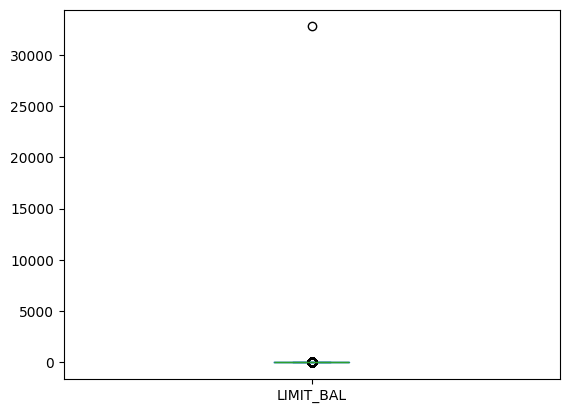

In [ ]:
data["LIMIT_BAL"].plot(kind="box")

<Axes: >

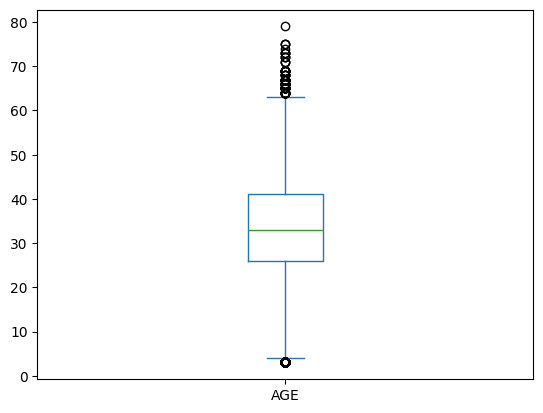

In [ ]:
data["AGE"].plot(kind="box")

#🔡 Encode Target Variable

In [ ]:
enc=LabelEncoder()

In [ ]:
data["Default Status"]=enc.fit_transform(data["Default Status"])

In [ ]:
data["Default Status"]

,Default Status
0,0
1,0
2,1
3,1
4,1
...,...
29995,1
29996,1
29997,0
29998,0


#🔢 Split Features and Target

In [ ]:
x=data.drop("Default Status",axis=1)

In [ ]:
y=data["Default Status"]

In [ ]:
cols=x.columns

#🔄 Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mx=MinMaxScaler()

In [ ]:
x=mx.fit_transform(x)

In [ ]:
x

array([[0.00000000e+00, 3.05185095e-05, 2.76315789e-01, ...,
        4.25260566e-03, 5.39091428e-03, 4.93273767e-03],
       [3.33355557e-05, 3.35703604e-04, 3.02631579e-01, ...,
        0.00000000e+00, 5.39091428e-03, 1.89155704e-06],
       [6.66711114e-05, 2.44148076e-04, 4.07894737e-01, ...,
        0.00000000e+00, 0.00000000e+00, 7.56622814e-06],
       ...,
       [9.99966664e-01, 6.10370190e-05, 4.47368421e-01, ...,
        7.75199661e-05, 2.34451197e-06, 5.67467111e-05],
       [1.00000000e+00, 2.13629566e-04, 5.00000000e-01, ...,
        3.63965695e-03, 1.24172387e-01, 3.46154937e-04],
       [6.66711114e-05, 1.22074038e-04, 5.65789474e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
x=pd.DataFrame(x,columns=cols)

In [ ]:
x

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.000000,0.000031,0.276316,0.141928,0.066517,0.185741,0.115162,0.109419,0.116589,0.002991,4.084885e-04,0.006187,0.004253,0.005391,0.004933
1,0.000033,0.000336,0.302632,0.140828,0.067858,0.188084,0.086961,0.084074,0.092670,0.002991,0.000000e+00,0.000000,0.000000,0.005391,0.000002
2,0.000067,0.000244,0.407895,0.164551,0.067575,0.200875,0.098328,0.095470,0.104303,0.001737,8.312266e-06,0.000000,0.000000,0.000000,0.000008
3,0.000100,0.000122,0.447368,0.142630,0.111995,0.242893,0.112700,0.109363,0.117555,0.000001,1.294339e-04,0.000026,0.000019,0.000394,0.000000
4,0.000133,0.000122,0.710526,0.146130,0.066759,0.227070,0.083900,0.099633,0.107694,0.000001,2.177814e-02,0.000000,0.000015,0.001613,0.001282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.999900,0.000641,0.473684,0.307214,0.249208,0.218286,0.084506,0.111622,0.091095,0.000096,5.937333e-07,0.000125,0.000654,0.000009,0.000000
29996,0.999933,0.000427,0.526316,0.139936,0.067955,0.185344,0.092827,0.081163,0.116589,0.002102,2.092910e-03,0.021545,0.000242,0.005391,0.004933
29997,0.999967,0.000061,0.447368,0.141617,0.069405,0.188174,0.086556,0.083208,0.107908,0.002991,1.734747e-03,0.000050,0.000078,0.000002,0.000057
29998,1.000000,0.000214,0.500000,0.136963,0.140604,0.193908,0.137841,0.092403,0.135918,0.000982,2.066192e-04,0.002819,0.003640,0.124172,0.000346


#🧪 Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=10)

In [ ]:
x_train.shape

(18000, 15)

In [ ]:
y_train.shape

(18000,)

In [ ]:
x_test.shape

(12000, 15)

In [ ]:
y_test.shape

(12000,)

#🤖 Naive Bayes Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model=GaussianNB()

In [ ]:
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
model.score(x_train,y_train)

0.7541111111111111

In [ ]:
model.score(x_test,y_test)

0.7435

#📊 Model Predictions & Evaluation

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

[1 1 1 ... 1 1 1]


In [ ]:
ac = accuracy_score(y_test, y_pred)
print(ac)

0.7435


In [ ]:
pc=precision_score(y_test, y_pred)
print(pc)

0.7707988500740482


In [ ]:
rc=recall_score(y_test, y_pred)
print(rc)

0.9519096288327058


In [ ]:
cr=classification_report(y_test,y_pred,digits=5)
print(cr)

              precision    recall  f1-score   support

           0    0.14203   0.02736   0.04588      2705
           1    0.77080   0.95191   0.85183      9295

    accuracy                        0.74350     12000
   macro avg    0.45642   0.48963   0.44886     12000
weighted avg    0.62906   0.74350   0.67016     12000



In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[  74 2631]
 [ 447 8848]]
